# Definition of Column headings

1. Age :  candidate's age.
2. Sex : 1 denotes male and 0 denotes female.
3. Cp : Chest Pain pain with values between 0-3. Also known as Angina, the higher the number, the lower the odds of an heart attack, Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic.
4. Trestpbs : Resting blood pressure which is normal blood pressure when not exercising.
5. Chol : Cholesterol presence denotes blockage for blood supply in the blood vessels.
6. Fbs : Fasting Blood Sugar is blood sugar test taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning (1 = true; 0 = false).
7. Restecg : Rest ECG results means ECG values taken while person is at rest i.e not exercising and heart functions normally.
8. Thalach : The Maximum Heart Rate achieved.
9. Exang : Exercise induced angina i.e chest pain while exercising or doing any physical activity, (1 = yes; 0 = no).
10. Oldpeak : ST Depression is the difference between the ECG value at rest and after exercise.
11. Slope: ST Slope is the tangent to the depression value.
12. Ca : The number of major blood vessels supplying blood to heart that are blocked.
13. Thal : The Types of thalassemia signified by reduced blod haemoglobin,(3 = normal; 6 = fixed defect; 7 = reversible defect).
14. Target : Heart attack prediction where 1 denotes Heart attack and 0 no heart attack.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# EDA

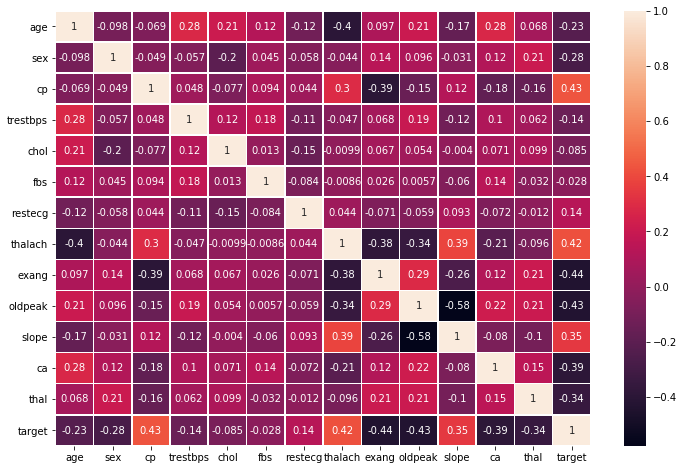

In [11]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, annot=True,  linewidths=.6, ax = ax)

There's a positive correlation between chest pain (cp) and target (our predictor), the greater the amount of chest pain, the more the likelihood of an heart attack.
There's also a negative correlation between exercise induced angina (exang) and target because during exercise, the heart requires more blood but narrow arteries slow down blood flow.

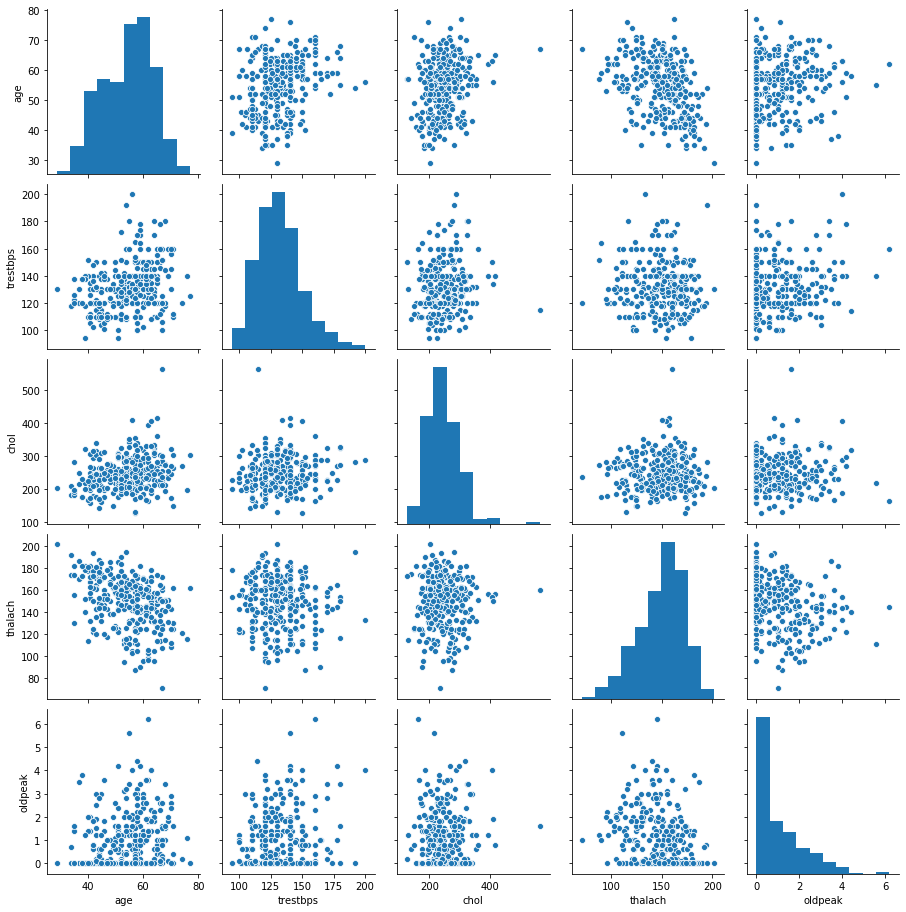

In [38]:
ContinuousData = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(ContinuousData)

In [80]:
pd.crosstab([data.sex,data.cp],data.target,margins=True).style.background_gradient()

This shows that 83 males with chest pain type 0 are at the highest risk of an heart attack (target 0), the trend generally shows that the higher the value of the cp type, the lower the risk of an heart attack for both sexes.

In [79]:
pd.crosstab([data.sex,data.thal],data.target,margins=True).style.background_gradient()

The relationship between thalalsaemia type and the frequency of having an heart attack, the general trend shows that those with type 3 thalasaemia in both sexes are more at risk of an heart attack

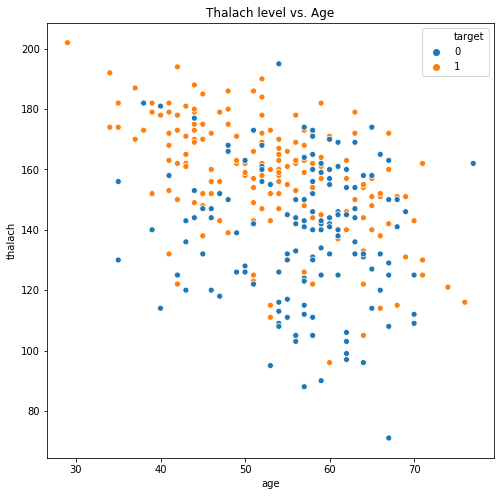

In [63]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=data['age'],y=data['thalach'],hue=data['target'])
plt.title("Thalach level vs. Age")
plt.xlabel('age')
plt.ylabel('thalach')
plt.show()

Text(0, 0.5, 'Thalach Level')

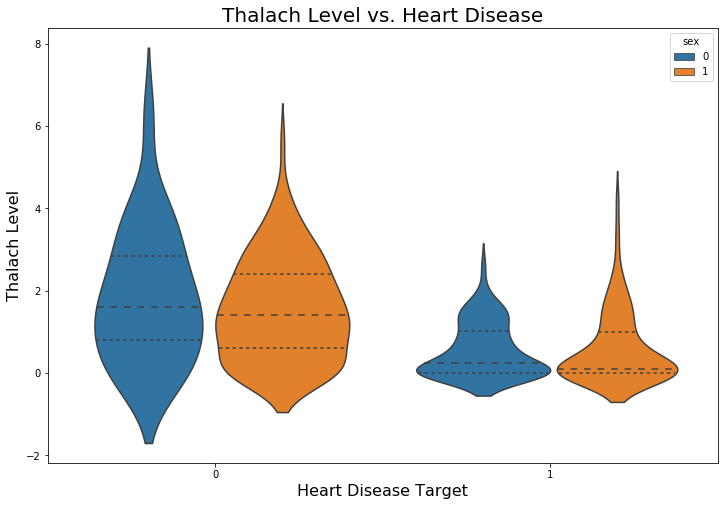

In [64]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= data )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

There's not much difference between male and female target outcomes, but there's a lot of difference between the shape and distribution for negative (0) and positive (1) patients.
Negative patients are mostly distributed between 1 and 3 with a higher median while positive patients exhibit a lower median for ST depression level with more data distribution between 0 and 2.

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

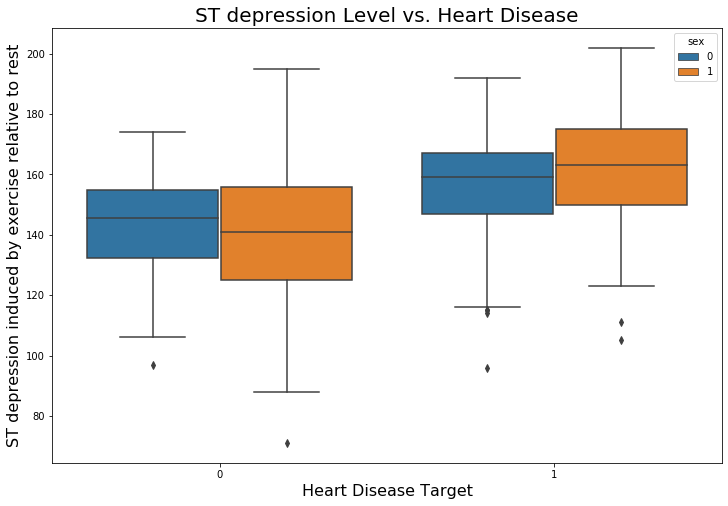

In [40]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=data )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

Positive patients exhibit a high median for ST depression level, while negative patients have lower levels. In addition,there aren't many differences between male & females, expect that males have slightly larger ranges of ST Depression

# Modelling

We'll train various classification models on the training set to see which model yields the highest accuracy. We first assign the 13 features to x and the last column (target) to our predictor, y. Then we split the model and then normalize so its distribution has a mean of '0' and a standard deviation of 1. 

In [41]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [45]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



Model 3: SVM (Support Vector Machine)

In [46]:
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



Model 4: Naives Bayes Classifier

In [47]:
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



Model 5: Decision Trees

In [48]:
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



Model 6: Random Forest

In [49]:
 from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



Model 7: XGBoost

In [50]:
from sklearn.ensemble import GradientBoostingClassifier 

model7 = GradientBoostingClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.72      0.60      0.65        30
           1       0.67      0.77      0.72        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[21  9]
 [ 3 28]]


0.8032786885245902

Model 6 shows twelve errors i.e 9 Type 1 errors (False Positives) and 3 Type 2 errors (False Negatives).
Accuracy = (TP + TP)/(TP +TN +FP +FN
Accuracy = (21 +28)/ (21+28+9+3) = 0.80 i.e'80 % accuracy.

# Feature Engineering

In [52]:
# get importance
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


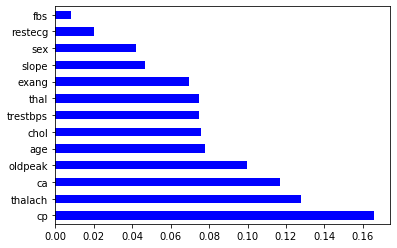

In [53]:
index= data.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

Feature importance shows the various features and their level of significance. The higher the feature score, the more the importance of the feature in making decisions. Our data shows four significant features which are oldpeak, ca, thalach and cp. From an increasing order of significance, it shows the Max heart rate, the number of vessels supplying blood to the heart that are blocked, ST depression and chest pain being the most significant features causing heart disease.

# Prediction
The features below are of a 41 year old male with chest pain value of 1 and resting blood pressure of 130, a serum cholesterol of 204, maximum heart rate of 172. We input his info into the ML algorithm

In [54]:
41,0,1,130,204,0,0,172,0,1.4,2,0,2

(41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2)

In [57]:
print(model6.predict(sc.transform([[41,0,1,130,204,0,0,172,0,1.4,2,0,2]])))

[1]


# Conclusion

In [60]:
import numpy as np
y_pred = model6.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


The first value above (column) represents our predicted value while the second value represents the actual value.
If the values match, this means our prediction is correct.
The Random forest Algorithm yields the highest accuracy of 80% and our ML algorithm can classify patients with heart disease. Being able to correctly diagnose and detect these feature early would help to prevent worsening symptoms and ultimately prevent morbidity.
This means fewer healthy patients are misdiagnosed as having heart disease and real patients can be attended to quickly.
